In [2]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
The exam is set up as follows:
* Q1 has 4 parts, of 3 points each
* Q2-Q9: 4 points each
* Q10-Q13: 7 points each
* Q14-Q15: 9 points each
* Q16: 10 points

The exam is open-book, open-notes, open-Google. You have 3 hours. Best of luck!

---
## Question 1

![splotches](splotches.png)

Consider the above classification problem. For each question below, answer using a percentage or a fraction, and give a brief justification. You may assume that each blob has the same number of points.

### [Q1a 3 points] What accuracy can a logistic regression classifier achieve?

A logistic regression classifier can achieve a 75% accuracy on these splotches by drawing a vertical line at x = 10 and classifying anything to the left as green and anything to the right as red. In this manner it will correctly classify the two splotches to the left as green and will correctly classify 4/6 splotches to the right as red, creating a 6/8 or 75% accuracy. 

### [Q1b 3 points] What is the accuracy of a decision tree with max_depth=1?

Recall that a depth-1 decision tree looks like this:
![depth1](depth1.png)

A decision tree with max_depth = 1 would achieve the same accuracy as the logistic regression classified and use the same condition for splitting, which is that if x<-10, then classify as green, while if x>-10, classify as red. This will give you the same 6/8 or 75% accuracy

### [Q1c 3 points] Best extension to depth-2 tree.
Suppose you could extend the max_depth=1 tree you built above by an extra level to build a max_depth=2 tree. For example, your new tree can look like one of the following, with "Condition 1" being the same as the "Condition" in the tree you built for question (b).

<table border=0 padding=0><tr><td> ![depth2a](depth2a.png) </td><td> or </td><td> ![depth2b](depth2b.png) </td></tr></table>

What is the best accuracy you can get?

Using the same condition 1 as in Q1b, we cannot improve the accuracy of our model, as we would need a depth of 3 to add any further predictive accuracy. Thus, the best accuracy we can get by adding one more condition to the condition from Q1b is also 75%

### [Q1d 3 points] What is the best accuracy possible using a max_depth=2 decision tree?

You are allowed to use any settings for Conditions 1, 2, and 3.

The max possible accuracy that can be obtained from using a tree of max depth = 2 is 100%. To do this, you would initially split on the condition x>0 or x<0. Then, if x>0, you split again on x>10 or x<10, and if x>10, classify as red, x<10 classify as green. For the x<0 side, you then use the condition x<-10, x>-10 and if it fits x<-10, classify as green, while if it fits x>-10, classify as red. Using this, you will correctly classify each splotch. The full rules are below

if x>0 AND x>10, classify RED <br>
if x>0 AND x<10, classify GREEN <br>
if x<0 AND x<-10, classify GREEN <br>
if x<0 AND x<0 AND x>>-10, classify RED

---

We will analyze a dataset about political consultants and the clients they work for. Each row records the particulars of one particular consultant working for one client in one reporting period. Here, we will describe some of the important columns:
* **Reporting Period, Year, and Filing Date**: Political consultants must file records about the people they work for in every reporting period, e.g., July 1 - December 31. The year is self-explanatory. The "Filing Date" records the date on which the report was filed.
* **Filing Type, Correction Type**: This specifies the kind of report being filed. If the Filing Type was CORRECTION, the Correction Type is noted.
* **Political Consultant (PC) Name, PC Business Name**: The name of the dude doing the work, and the consulting company that he or she works for.
* **Client Name, Client Type**: The name of the person or entity for whom the consultant is working, and the type of person or entity, e.g., "public official".
* **Office Held/Sought**: The particulars of the public office that the client currently holds, or hopes to contest.
* **Description of Services Provided**: What exactly is the consultant doing for the client?

In [12]:
df = pd.read_csv('OneDrive/Documents/MSBA Summer 2018/Data Analytics Programming/consultant.csv')
df.loc[0]['Year']

2016

### [Q2 4 points] What are the different types of "Filing Type"?

In [9]:
df['Filing Type'].unique()

array(['PUBLIC DISCLOSURE', 'CORRECTION'], dtype=object)

### [Q3 4 points] Among the rows where "Filing Type" equals CORRECTION, what fraction have a valid "Correction Type"?

The Correction Type entry is valid if it is not missing.

In [307]:
CorrectionMask = df['Filing Type'] == 'CORRECTION'
Correctiondf = df[CorrectionMask]
print "Of the Correction filing type,", str(Correctiondf['Correction Type'].notnull().sum()/float(len(Correctiondf))*100) + "% have valid correction types"              

 Of the Correction filing type, 11.214953271028037% have valid correction types


### [Q4 4 points] Is it true that whenever "Correction Type" has valid (non-missing) entries, then the "Filing Type" is CORRECTION?

In [22]:
ValidCorrection = df[df['Correction Type'].notnull()]
print ValidCorrection['Filing Type'].unique()

print "When the correction type is not missing, filing type is always correction"

['CORRECTION']
When the correction type is not missing, filing type is always correction


### [Q5 4 points] Convert the DataFrame into a time series with Filing Date as the index.

Make sure the index is of type "datetime" and not "string". Also remember to sort the dates.

In [52]:
Timedf = df.copy()
Timedf['Filing Date'] = pd.to_datetime(Timedf['Filing Date'])
Timedf.set_index('Filing Date', inplace = True)
Timedf['Description of Services Provided'][:5]

Filing Date
2017-02-03    DIRECT VOTER CONTACT - MAIL AND MEDIA
2017-02-03                            TV COMMERCIAL
2017-02-03                             DIRECT MAIL 
2017-02-03                              DIRECT MAIL
2017-02-03                               COMPLIANCE
Name: Description of Services Provided, dtype: object

### [Q6 4 points] When the "Client Type" is "PUBLIC OFFICIAL/CANDIDATE", who are the top 10 most frequently mentioned clients ("Client Name")?

In [93]:
PubOffCand = df[df['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE']
PubOffCand['Client Name'].value_counts()[:10]

LANDER, BRAD           43
DE BLASIO, BILL        39
POWERS, KEITH          33
DOYLE, JOHN            32
VAN BRAMER, JIMMY      28
CURRAN, LAURA          28
WALTER, RUTH           28
SILVER, MARY           28
KALLOS, BEN            28
SINGAS, MADELINE       28
Name: Client Name, dtype: int64

### [Q7 4 points] Which 5 political offices ("Office Held/Sought") attract the most number of clients ("Client Name")?

In [44]:
df['Office Held/Sought'].value_counts()[:5]


NYC COUNCIL        171
CITY COUNCIL       152
CITY COUNCIL        58
NY STATE SENATE     47
MAYOR               40
Name: Office Held/Sought, dtype: int64

### [Q8 4 points] "PAID COMMUNICATIONS" and "FIELD SERVICES".

Under "Description of Services Provided", you will find many strings containing the words "PAID COMMUNICATIONS" and also the words "FIELD SERVICES". Find all the different ways in which these services are described.
* For example, you may find "PAID COMMUNICATIONS & FIELD SERVICES" and "PAID COMMUNICATIONS AND FIELD SERVICES".
* What other variants are there?
* NOTE: There are descriptions called just "PAID COMMUNICATIONS", that don't include "FIELD SERVICES." We are not talking about these.

In [83]:
def findall (s):
    found = re.findall('.*PAID COMMUNICATIONS.*FIELD SERVICES.*', s)
    if len(found)>0:
        return True
    else:
        return False

df['PC FS'] = df['Description of Services Provided'].map(findall)
PCFS = df[df['PC FS'] == True]
print "There are", len(PCFS['Description of Services Provided'].unique()), "different ways that paid communications and field services are entered in the data frame"
print PCFS['Description of Services Provided'].unique()

There are 9 different ways that paid communications and field services are entered in the data frame
['PAID COMMUNICATIONS AND FIELD SERVICES '
 'PAID COMMUNICATIONS AND FIELD SERVICES'
 'PAID COMMUNICATIONS AND FIELD SERVICES.  '
 'PAID COMMUNICATIONS AND FIELD SERVICES.'
 'PAID COMMUNICATIONS AND FIELD SERVICES. '
 'PAID COMMUNICATIONS & FIELD SERVICES'
 'PAID COMMUNICATIONS & FIELD SERVICES. '
 'PAID COMMUNICATIONS & FIELD SERVICES '
 'PAID COMMUNICATIONS & FIELD SERVICES.']


### [Q9 4 points] Who uses the most different consultant companies?

A candidate can have many different political consultants, but they may be from the same company. For each "Client Name" whose "Client Type" is "PUBLIC OFFICIAL/CANDIDATE", find out the number of unique consulting companies ("PC Business Name") with whom he or she has engaged. Print out the top 10 client names who have engaged with the most consulting companies.

In [121]:
PublicOfficeCand = df[df['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE']
pivot = pd.pivot_table(PublicOfficeCand, values = 'PC Business Name', aggfunc=lambda x: len(x.unique()), index = 'Client Name')
pivot['PC Business Name'].sort_values(ascending = False)[:10]

Client Name
GONZALEZ, ERIC                  7
ALCANTARA, MARISOL              6
KLEIN, JEFFREY D                5
DE LA ROSA, CARMEN              5
GJONAJ, MARK                    4
CARLUCCI, DAVID                 4
AVELLA, TONY                    4
KAMINSKY, TODD                  4
LANDER, BRAD                    4
FERRERAS-COPELAND, JULISSA      4
Name: PC Business Name, dtype: int64

### [Q10 7 points] Plot the top 10  "Description of Services Provided", after cleaning up these descriptions.

As we saw with "PAID COMMUNICATIONS" and , there are many ways of saying the same thing. So, we will try to come up with canonical descriptions.

For each string under "Description of Services Provided", do the following steps (in this particular order):
* Remove any spaces from the beginning of the string
* Remove any spaces at the end of the string
* Remove any full-stop ('.') at the end of the string

Store these cleaned description in a new column called "Cleaned Descriptions", and plot the top 10 most frequent "Cleaned Descriptions".

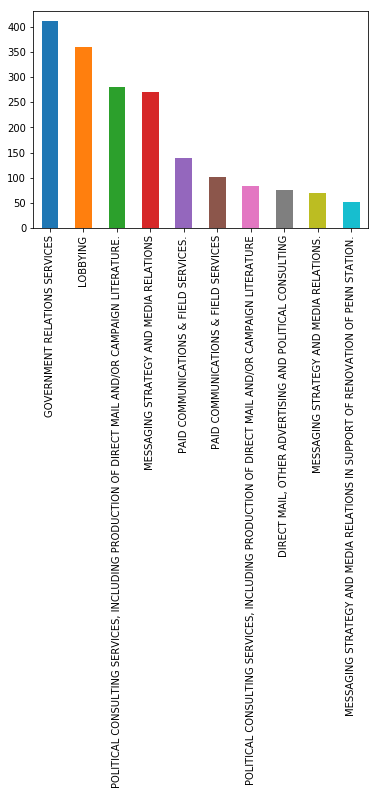

In [127]:
def cleaner (s):
    s = s.lstrip(" ")
    s = s.strip(" ")
    s = s.lstrip(".")
    return s

df['Cleaned Descriptions'] = df['Description of Services Provided'].map(cleaner)
df['Cleaned Descriptions'].value_counts()[:10].plot(kind='bar')

### [Q11 7 points] Plot the number of filings for each month in the dataset.

The x-axis should go from Jan 2017 to July 2018. Use the "Filing Date" as the date of filing.

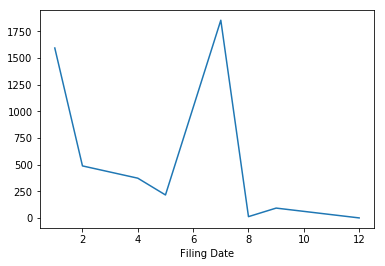

I am aware that this shows the total filings just sorted by month, not by month and by year, but I did not know how to sort by month and by year


In [315]:
TIMEDF = df.copy()
TIMEDF['Filing Date'] = pd.to_datetime(TIMEDF['Filing Date'])
df.groupby(TIMEDF['Filing Date'].dt.month).size().plot()
show()

print "I am aware that this shows the total filings just sorted by month, not by month and by year, but I did not know how to sort by month and by year"

### [Q12 7 points] What are the programs where consultants help with media relations and messaging support?

In the "Cleaned Descriptions", you will find several strings of the form "MEDIA RELATIONS AND MESSAGING SUPPORT". Each such string lists the "program" which is getting the support. For example:
* MEDIA RELATIONS AND MESSAGING SUPPORT FOR PACIFIC PARK BROOKLYN
    * The program is "FOR PACIFIC PARK BROOKLYN"
* MEDIA RELATIONS AND MESSAGING SUPPORT FOR LINKNYC
    * The program is "FOR LINKNYC"
* MEDIA RELATIONS AND MESSAGING SUPPORT AROUND FREELANCER ISSUES
    * The program is "AROUND FREELANCER ISSUES"

Print out all the unique programs getting such public relations support.

**NOTE**: If you were unable to compute the Cleaned Descriptions in Q10, just say so in a comment, and use
> df['Cleaned Descriptions'] = df['Description of Services Provided']

In [206]:
descrlist = df['Cleaned Descriptions'].unique()

Media_Rel = []
for descr in descrlist:
    unsplit = re.findall('.*MEDIA RELATIONS AND MESSAGING SUPPORT.*', descr)
    if len(unsplit)>0:
        program = unsplit[0].split('MEDIA RELATIONS AND MESSAGING SUPPORT')[-1]
        Media_Rel.append(program)

Media_Rel = set(Media_Rel)
print "There are", len(Media_Rel), "different programs"
Media_Rel
                    

There are 25 different programs


{' AROUND FREELANCER ISSUES',
 ' AROUND FREELANCER ISSUES, INCLUDING NONPAYMENT PROTECTION',
 ' AROUND FREELANCER ISSUES, INCLUDING NONPAYMENT PROTECTION.',
 ' AROUND FREELANCER ISSUES.',
 ' FOR ADVOCACY CAMPAIGNS TO FIGHT HOMELESSNESS',
 ' FOR ADVOCACY CAMPAIGNS TO FIGHT HOMELESSNESS.',
 ' FOR CITI BIKE',
 ' FOR CITI BIKE.',
 ' FOR CRIMINAL JUSTICE REFORM EFFORTS IN NY.',
 ' FOR LIBRARY REDEVELOPMENT',
 ' FOR LIBRARY REDEVELOPMENT.',
 ' FOR LINKNYC',
 ' FOR LINKNYC.',
 ' FOR PACIFIC PARK BROOKLYN',
 ' FOR PACIFIC PARK BROOKLYN.',
 ' FOR PARK BROOKLYN',
 ' FOR SEVERAL NON-PROFIT PROGRAMS  AND PROJECTS, AND ADVOCACY FOR PEOPLE WITH HIV/AIDS.',
 ' FOR SEVERAL NON-PROFIT PROGRAMS AND ADVOCACY FOR PEOPLE WITH HIV/AIDS.',
 ' FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS',
 ' FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS AND ADVOCACY FOR PEOPLE WITH HIV/AIDS.',
 ' FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS, AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 ' FOR SEVERAL NON-PROFIT PROGRAMS AND PROJEC

### [Q13 7 points] Unique senate districts.

Consider all "Office Held/Sought" fields of the form "NYS SENATE *blah* DISTRICT". Extract the district identifier (*blah*) and figure out the number of unique districts represented in the data. For example:
* "NYS SENATE 31ST DISTRICT" $\Rightarrow$ district identifier is "31ST"

In [234]:
def senateornot(s):
    string = re.findall('NYS SENATE.*[0-9].*DISTRICT', s)
    if len(string) >0:
        return True
    else:
        return False


def getdistrict(s):
    s = s.split("SENATE")[-1]
    s = s.lstrip('-')
    s = s.rstrip(" DISTRICT")
    s = s.rstrip("TH")
    s = s.rstrip("RD")
    s = s.lstrip(" ")
    return s

Senatedf = df.copy()

Senatedf['Senate'] = Senatedf['Office Held/Sought'].dropna().map(senateornot)

JustSenate = Senatedf[Senatedf['Senate'] == True]
JustSenate['Office Held/Sought'].unique()

JustSenate['District'] = JustSenate['Office Held/Sought'].map(getdistrict)

print "There are", len(JustSenate['District'].unique()), "unique senate districts in the data set"

print JustSenate['District'].unique()




There are 11 unique senate districts in the data set
['31' '38' '34' '11' '36' '18' '80' '20' '13' '23' '53']


C:\Users\blueh\Anaconda2\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### [Q14 9 points] Find clients who hire multiple consultant firms for the same job.

For each pair of "Client Name" and "Cleaned Descriptions", figure out the number of unique "PC Business Names" who have done work of that description for that client. List the clients who had 4 or more PC Businesses work on some "Cleaned Description."
For example:
* If client BILL BLASIO had 3 consulting firms for "DIRECT VOTER CONTACT", 2 firms for "DIRECT MAIL" and 5 firms for "PAID COMMUNICATIONS", we want to list BILL BLASIO in the output since "PAID COMMUNICATIONS" had 5 firms.
* If client ERIC GONZALEZ had 3 firms for "DIRECT VOTER CONTACT" and 3 firms for "DIRECT MAIL", we won't output ERIC GONZALEZ since all Cleaned Descriptions had fewer than 4 associated firms.

In [329]:
NewDF = df.copy()

NewDF['CliendANDDesc'] = NewDF['Client Name'] + ", " +  NewDF['Cleaned Descriptions']

print("All listed client description pairs with True listed have more than 4, I did not have time to clean the output to only show client")


NewDF['CliendANDDesc'].value_counts()>4



All listed client description pairs with True listed have more than 4, I did not have time to clean the output to only show client


COALITION FOR THE HOMELESS, MEDIA RELATIONS AND MESSAGING SUPPORT FOR ADVOCACY CAMPAIGNS TO FIGHT HOMELESSNESS.                                                                                                                       True
ARCHDIOCESE OF NEW YORK, MEDIA RELATIONS, CREATIVE DESIGN SERVICES SUPPORT.                                                                                                                                                           True
PROFESSIONAL STAFF CONGRESS, MESSAGING STRATEGY AND MEDIA RELATIONS IN SUPPORT OF INCREASED HIGHER EDUCATION FUNDING.                                                                                                                 True
THE FREELANCERS UNION, MEDIA RELATIONS AND MESSAGING SUPPORT AROUND FREELANCER ISSUES, INCLUDING NONPAYMENT PROTECTION.                                                                                                               True
FRIENDS OF THE BQX, MESSAGING STRATEGY AND MEDIA RELATIONS I

### [Q15 9 points] Busy seasons

For each "Political Consultant (PC) Name", do the following:
* Figure out the number of unique Client Names associated with this Political Consultant (PC) Name in each Reporting Period.
* Find the Reporting Period when he/she had the most unique Client Names. Call this the "busy season" for this particular Political Consultant.

Now, for each Reporting Period, figure out how many Political Consultant (PC) Names call it their busy season.

Note: A Political Consultant may do multiple jobs for a given Client in each Reporting Period.

In [280]:
CT = pd.crosstab(df['Political Consultant (PC) Name'], df['Reporting Period'], values = df['Client Name'], aggfunc=lambda x: len(x.unique()))

tab = CT.T.idxmax()

tab.value_counts()


JULY 1 - DECEMBER 31    31
JANUARY 1 - JUNE 30     27
dtype: int64

### [Q16 10 points] Connections between public officials and businesses

Let's say a politician P and a business B are *connected* if there is a consultant firm C that is consulting for both P and B. If there is only one such consulting firm, the "strength" of the connection is 1. If there are two different consulting firms consulting for both P and B, the strength of the connection between P and B is 2, and so on. If the same consultant firm is linked to P and B in two different "Reporting Periods", that still counts as 1 when computing connection strength between P and B.

Find the public official and the business with the strongest connection.

Note: A politician has "Client Type" as "PUBLIC OFFICIAL/CANDIDATE", while every other "Client Type" is a business. The consultant firm is specified by "PC Business Name".

In [303]:
PoliticianMask = df['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE'

Business = df[-PoliticianMask]
Politician = df[PoliticianMask]

Business = Business.drop_duplicates(subset = ['Client Name', 'Political Consultant (PC) Name'])
Politician = Politician.drop_duplicates(subset = ['Client Name', 'Political Consultant (PC) Name'])

Merged = Business.merge(Politician, left_on = 'Political Consultant (PC) Name', right_on = 'Political Consultant (PC) Name')
Merged['BusinessANDPolitician'] = Merged['Client Name_x'] + " and " + Merged['Client Name_y']
print "The business and public official with the strongest connection are", Merged['BusinessANDPolitician'].value_counts()[:1]


The business and public official with the strongest connection are BROOKLYN PUBLIC LIBRARY and LANDER, BRAD      17
Name: BusinessANDPolitician, dtype: int64
